<a href="https://colab.research.google.com/github/ldsbalu/Balu-Portfolio/blob/main/ESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


    Determines payoffs based on the Hawk-Dove matrix.<br>
    D = Dove, H = Hawk
    Matrix:
         D       H
    D  (4,4)   (1,5)
    H  (5,1)   (0,0)
    
   

In [4]:
def play_game(bird1, bird2):
  if bird1 == 'D' and bird2 == 'D':
        return 4, 4
  elif bird1 == 'D' and bird2 == 'H':
        return 1, 5
  elif bird1 == 'H' and bird2 == 'D':
        return 5, 1
  elif bird1 == 'H' and bird2 == 'H':
        return 0, 0
  return 0, 0

In [5]:
def run_simulation(start_doves, start_hawks, steps=1000):

    population = ['D'] * start_doves + ['H'] * start_hawks

    history_doves = [start_doves]
    history_hawks = [start_hawks]
    history_fraction_doves = [start_doves / (start_doves + start_hawks)]

    for t in range(steps):
        current_total = len(population)


        if current_total < 2:
            break # Cannot play if less than 2 birds

        # random.sample handles sampling without replacement
        indices = random.sample(range(current_total), 2)
        bird1 = population[indices[0]]
        bird2 = population[indices[1]]

        #Play game and record utility
        payoff1, payoff2 = play_game(bird1, bird2)

        # Birds return, new birds added equal to payoff
        # We append new birds of the SAME type to the population
        population.extend([bird1] * payoff1)
        population.extend([bird2] * payoff2)


        count_d = population.count('D')
        count_h = population.count('H')
        total = count_d + count_h

        history_doves.append(count_d)
        history_hawks.append(count_h)
        history_fraction_doves.append(count_d / total if total > 0 else 0)

    return history_doves, history_hawks, history_fraction_doves

In [6]:
def plot_results(start_d, start_h, steps=1000):

    doves, hawks, fractions = run_simulation(start_d, start_h, steps)
    time_axis = range(len(doves))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Graph 1: Number of Doves and Hawks vs Time
    ax1.plot(time_axis, doves, label='Doves', color='blue')
    ax1.plot(time_axis, hawks, label='Hawks', color='red')
    ax1.set_title(f'Population Counts (Start: {start_d} D, {start_h} H)')
    ax1.set_xlabel('Time Step (t)')
    ax1.set_ylabel('Number of Birds')
    ax1.legend()

    # Graph 2: Fraction of Doves vs Time
    ax2.plot(time_axis, fractions, label='Fraction Doves', color='green')
    ax2.axhline(y=0.5, color='gray', linestyle='--', label='ESS Prediction (0.5)')
    ax2.set_title(f'Fraction of Doves (Start: {start_d} D, {start_h} H)')
    ax2.set_xlabel('Time Step (t)')
    ax2.set_ylabel('Fraction of Population')
    ax2.set_ylim(0, 1)
    ax2.legend()

    plt.tight_layout()
    plt.show()

Running Experiment 1: 1 Dove, 10 Hawks


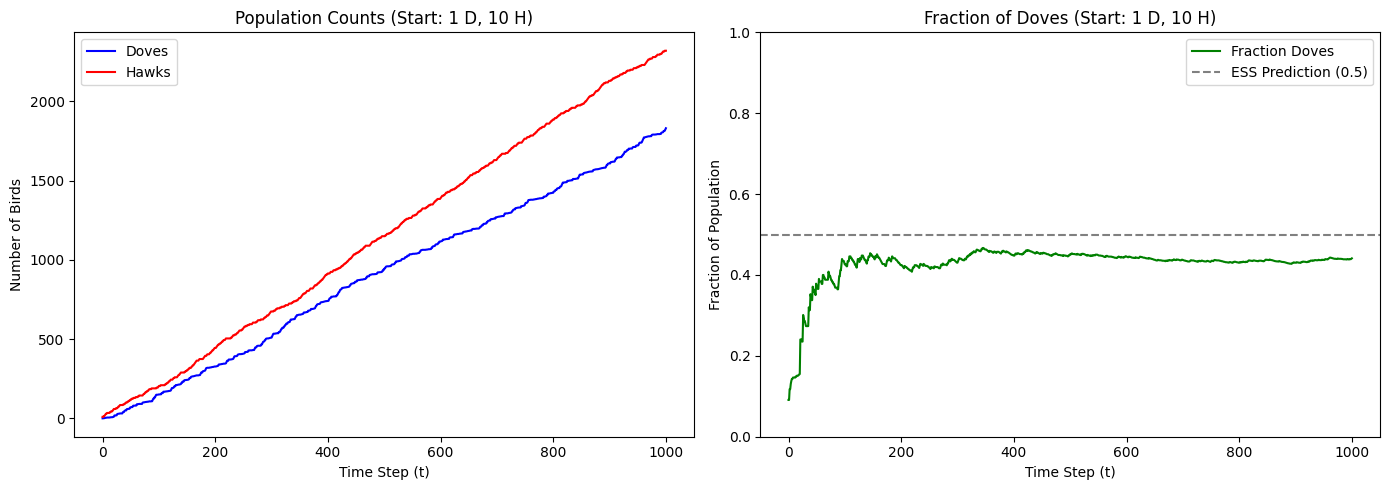

In [7]:
# Experiment 1: The required starting condition
print("Running Experiment 1: 1 Dove, 10 Hawks")
plot_results(start_d=1, start_h=10)



Running Experiment 2: 50 Doves, 2 Hawks


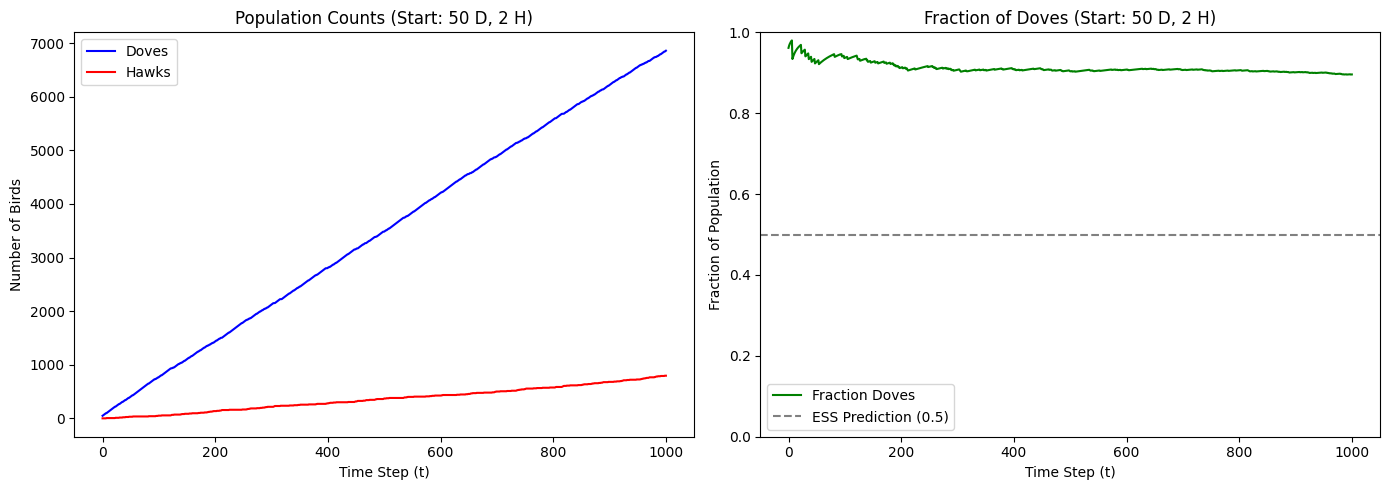

In [14]:
# Experiment 2: Heavy Dove dominance start
print("Running Experiment 2: 50 Doves, 2 Hawks")
plot_results(start_d=50, start_h=2)



Running Experiment 3: 10 Doves, 10 Hawks


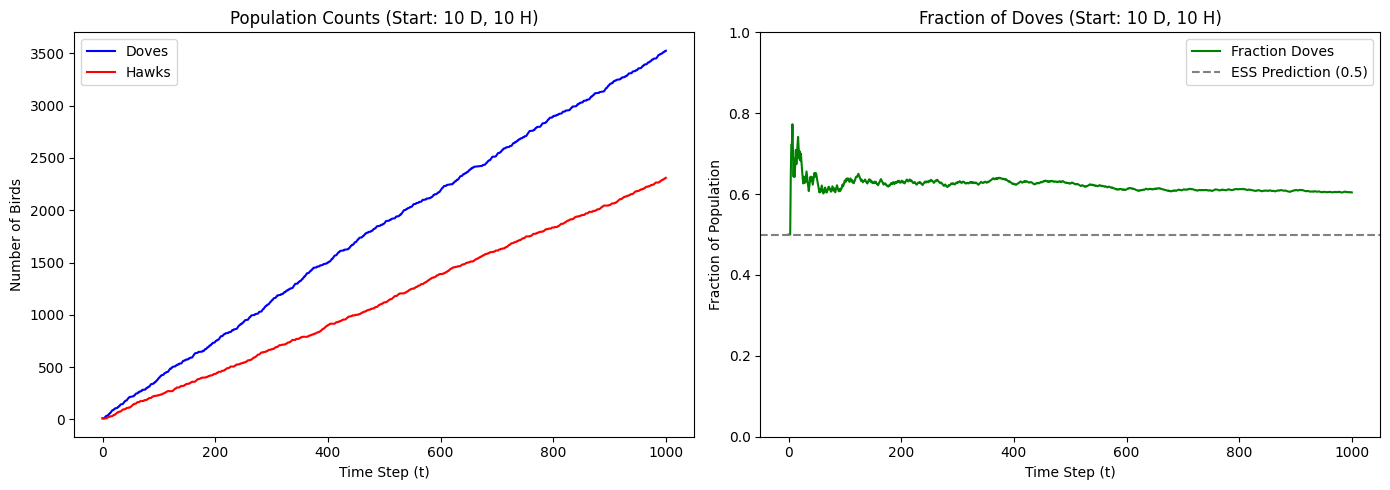

In [9]:
d# Experiment 3: Even start
print("Running Experiment 3: 10 Doves, 10 Hawks")
plot_results(start_d=10, start_h=10)